In [2]:
import rioxarray
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib import colors

In [3]:
# Load the GeoTIFF
da = rioxarray.open_rasterio('/home/ck/DIR/cornkle/data/EUMDAC_MSG_TESTS/FCI_HRFI_VIS0.6__m_Image_-_MTG_-_0_degree_2024-12-11_12_20/17240bd0-f98e-4399-b767-ef10435f7366.tiff')
ds = da.to_dataset(name="variable_name").squeeze().sel(x=slice(-18,50), y=slice(28,-37))
# Inspect the data
print(ds)
# Get the data extent in the CRS of the dataset
xmin, ymin, xmax, ymax = da.rio.bounds()

<xarray.Dataset> Size: 177MB
Dimensions:        (x: 13600, y: 13000)
Coordinates:
    band           int64 8B 1
  * x              (x) float64 109kB -18.0 -17.99 -17.99 ... 49.99 49.99 50.0
  * y              (y) float64 104kB 28.0 27.99 27.99 ... -36.99 -36.99 -37.0
    spatial_ref    int64 8B 0
Data variables:
    variable_name  (y, x) uint8 177MB ...


In [4]:
ds.x.values[1::] - ds.x.values[0:-1]

array([0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005])

In [6]:
perc = np.percentile(ds['variable_name'].values, [5,95])

In [17]:
perc

array([ 32., 171.])

In [ ]:
# Plot with Cartopy
fig, axes = plt.subplots(
    figsize=(10, 5), nrows=1, ncols=2,
    subplot_kw={"projection": ccrs.Mercator()}
)

# f = plt.figure(figsize=(15, 8))
# ax = f.add_subplot(211)

# Plot the data

# Define custom levels
levels = np.linspace(1, 254, 254)  # 20 intervals from 0 to 100

# Create a normalization for the colormap
norm = colors.BoundaryNorm(boundaries=levels, ncolors=len(levels)-1)

ax = axes[0]
ds['variable_name'].plot.imshow(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis", norm=norm, interpolation="none",regrid_shape=13600)
# Set the map extent to the data bounds
ax.set_extent([-18, 50, -37, 28], crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle="--", color="gray")
gl.top_labels = False
gl.right_labels = False

plt.title("Full domain")

##############
ax = axes[1]
ds['variable_name'].plot.imshow(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis", norm=norm, interpolation="none", regrid_shape=13600)
# Set the map extent to the data bounds
ax.set_extent([22, 32, -20, -8], crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines(resolution='50m', color='black', linewidth=1)
ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add gridlines
gl = ax.gridlines(draw_labels=True, linestyle="--", color="gray")
gl.top_labels = False
gl.right_labels = False

plt.title("Percentile filtered zoom")

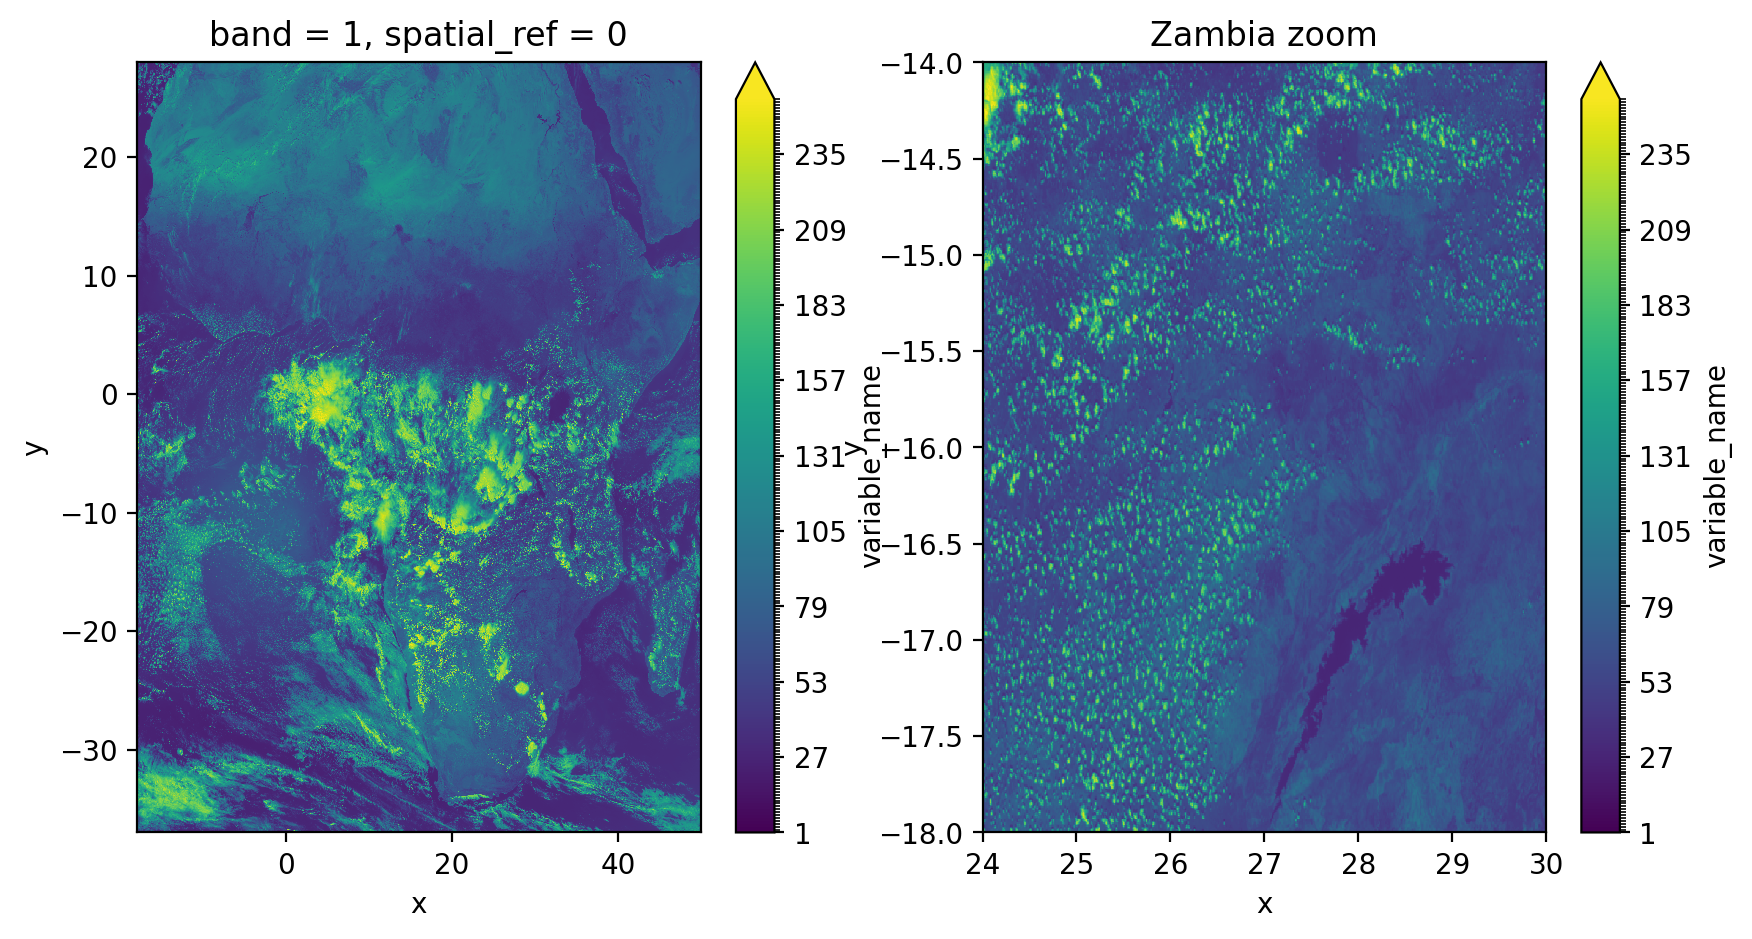

In [7]:
# Plot with Cartopy
fig, axes = plt.subplots(
    figsize=(10, 5), nrows=1, ncols=2, dpi=200)

# f = plt.figure(figsize=(15, 8))
# ax = f.add_subplot(211)

# Plot the data

# Define custom levels
levels = np.linspace(1, 254, 254)  # 20 intervals from 0 to 100

# Create a normalization for the colormap
norm = colors.BoundaryNorm(boundaries=levels, ncolors=len(levels)-1)

ax = axes[0]
ds['variable_name'].plot.imshow(ax=ax, cmap="viridis", norm=norm, interpolation="none")
# Set the map extent to the data bounds
#ax.set_extent([-18, 50, -37, 28])

# Add coastlines and borders
# ax.coastlines(resolution='50m', color='black', linewidth=1)
# ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add gridlines
# gl = ax.gridlines(draw_labels=True, linestyle="--", color="gray")
# gl.top_labels = False
# gl.right_labels = False

plt.title("Full domain")

##############
ax = axes[1]
ds['variable_name'].plot.imshow(ax=ax, cmap="viridis", norm=norm, interpolation="none")
# Set the map extent to the data bounds
#ax.set_extent([22, 32, -20, -8])
ax.set_xlim(24,30)
ax.set_ylim(-18,-14)

# # Add coastlines and borders
# ax.coastlines(resolution='50m', color='black', linewidth=1)
# ax.add_feature(cfeature.BORDERS, linestyle=":")

# Add gridlines
# gl = ax.gridlines(draw_labels=True, linestyle="--", color="gray")
# gl.top_labels = False
# gl.right_labels = False

plt.title("Zambia zoom")
fig.savefig('/home/ck/DIR/cornkle/data/EUMDAC_MSG_TESTS/visible_check.png')

In [1]:
ds.x

NameError: name 'ds' is not defined